## Dataset initialization

In [1]:
import pandas as pd

#import data sets in methylation data
df=pd.read_csv('HumanMethylation450_selected_200.csv')

In [2]:
df.shape

(867, 202)

In [3]:
df=df.set_index('Unnamed: 0')

In [4]:
df.dtypes

cg1333326    float64
cg2448569    float64
cg0144328    float64
cg2628069    float64
cg1455721    float64
              ...   
cg2624275    float64
cg0801732    float64
cg0267012    float64
cg1897117    float64
Subtype      float64
Length: 201, dtype: object

## Preprocessing

### 1. Data Cleaning

In [5]:
# number of duplicates
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

cg1333326    0
cg2448569    0
cg0144328    0
cg2628069    0
cg1455721    0
            ..
cg2624275    0
cg0801732    0
cg0267012    0
cg1897117    0
Subtype      0
Length: 201, dtype: int64

In [7]:
# Count the null values containing features
n=(df.isnull().sum()>0).sum()
n

0

In [8]:
print('Count of zeros')
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if(count>0):
        print('\t', column_name, ' : ', count)

Count of zeros
	 Subtype  :  480


### 2. Feature Selection - Pearson correlation coefficient

In [9]:
#  use Pearson correlation coefficient to find the best features
cor = df.corr(method='pearson')
cor

,cg1333326,cg2448569,cg0144328,cg2628069,cg1455721,cg2385613,cg0098598,cg1620951,cg0031889,cg1345860,...,cg2765249,cg1824196,cg1624843,cg2430515,cg1134053,cg2624275,cg0801732,cg0267012,cg1897117,Subtype
cg1333326,1.000000,0.703996,0.636627,0.765603,0.883176,0.574947,0.756123,0.807576,0.776835,0.804568,...,0.835735,0.629114,0.852493,0.683310,0.802339,0.754419,0.772093,0.840975,0.753386,-0.280631
cg2448569,0.703996,1.000000,0.457124,0.591343,0.626119,0.672661,0.677646,0.870636,0.773842,0.837688,...,0.716713,0.577206,0.593996,0.629185,0.805002,0.547733,0.799793,0.746241,0.849790,-0.021518
cg0144328,0.636627,0.457124,1.000000,0.652570,0.676585,0.659734,0.691846,0.447344,0.608537,0.556172,...,0.611245,0.709990,0.701226,0.712128,0.543317,0.772851,0.572638,0.589133,0.457176,0.035869
cg2628069,0.765603,0.591343,0.652570,1.000000,0.731752,0.546090,0.730275,0.645708,0.652094,0.673344,...,0.723800,0.600017,0.774070,0.622743,0.687561,0.684567,0.666865,0.678553,0.599050,-0.188500
cg1455721,0.883176,0.626119,0.676585,0.731752,1.000000,0.534256,0.755094,0.736023,0.739483,0.742300,...,0.784889,0.640885,0.870753,0.619516,0.783804,0.777998,0.745201,0.797417,0.669815,-0.279800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg2624275,0.754419,0.547733,0.772851,0.684567,0.777998,0.559682,0.715382,0.594101,0.690947,0.650565,...,0.712306,0.627730,0.758222,0.628401,0.636844,1.000000,0.609362,0.697247,0.570675,-0.085365
cg0801732,0.772093,0.799793,0.572638,0.666865,0.745201,0.669025,0.744077,0.812835,0.774126,0.821979,...,0.727125,0.693235,0.690976,0.746984,0.814974,0.609362,1.000000,0.727780,0.796535,-0.089278
cg0267012,0.840975,0.746241,0.589133,0.678553,0.797417,0.584610,0.722429,0.812399,0.799892,0.831294,...,0.787707,0.588205,0.757016,0.600372,0.821957,0.697247,0.727780,1.000000,0.786140,-0.181622
cg1897117,0.753386,0.849790,0.457176,0.599050,0.669815,0.642906,0.680522,0.872526,0.836749,0.874896,...,0.712454,0.610092,0.597201,0.625921,0.817560,0.570675,0.796535,0.786140,1.000000,-0.045709


In [10]:
c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
high_cor = c1[c1.values!=1]    
high_cor[high_cor>0.9]

cg1468933  cg1260869    0.945757
cg2009721  cg1754233    0.943591
cg1620951  cg2009721    0.941084
cg2466300  cg0253179    0.940532
cg2068437  cg1629966    0.937378
                          ...   
cg1333326  cg1629966    0.900914
cg0714598  cg1333326    0.900801
cg2009721  cg1165704    0.900596
cg2541784  cg1009041    0.900579
cg2519589  cg1333326    0.900284
Length: 92, dtype: float64

In [11]:
# MultiIndex into temp file
temp= high_cor[high_cor>0.9].index

In [12]:
# temp set for store features which are high correlated
tset=set()

In [13]:
for i in range(temp.size):
    tset.add(temp[i][0])

In [14]:
len(tset)

37

In [15]:
tset

{'cg0093751',
 'cg0095282',
 'cg0103341',
 'cg0115714',
 'cg0195430',
 'cg0663891',
 'cg0666533',
 'cg0714598',
 'cg0733846',
 'cg0834842',
 'cg0859706',
 'cg1009041',
 'cg1165704',
 'cg1182264',
 'cg1333326',
 'cg1345860',
 'cg1407833',
 'cg1468933',
 'cg1519962',
 'cg1561875',
 'cg1612242',
 'cg1620951',
 'cg1629966',
 'cg1715891',
 'cg1754233',
 'cg1790158',
 'cg1897117',
 'cg2009721',
 'cg2068437',
 'cg2181533',
 'cg2233076',
 'cg2362287',
 'cg2391829',
 'cg2466300',
 'cg2486424',
 'cg2519589',
 'cg2541784'}

In [16]:
# drop highly correlated features  
df= df.drop(tset,axis=1)

In [17]:
# after removing more corelated features
df.shape

(867, 164)

In [18]:
cor = df.corr(method='pearson')

In [19]:
#correlation of variables with the target variable
cor_target = abs(cor["Subtype"])
cor_target

cg2448569    0.021518
cg0144328    0.035869
cg2628069    0.188500
cg1455721    0.279800
cg2385613    0.342933
               ...   
cg1134053    0.214456
cg2624275    0.085365
cg0801732    0.089278
cg0267012    0.181622
Subtype      1.000000
Name: Subtype, Length: 164, dtype: float64

In [20]:
#first 100 features with high correlation
high_cor_100=cor_target.iloc[cor_target.argsort()[-101:-1]]
high_cor_100

cg2543676    0.085302
cg2624275    0.085365
cg0819084    0.088844
cg0801732    0.089278
cg1041959    0.089706
               ...   
cg1587137    0.401576
cg1655166    0.403001
cg2178678    0.548097
cg0020480    0.609387
cg1543165    0.641748
Name: Subtype, Length: 100, dtype: float64

In [21]:
# select 100 features
selected_100_x = df[high_cor_100.index]
selected_100_x.shape

(867, 100)

In [22]:
#first 50 features with high correlation
high_cor_50=cor_target.iloc[cor_target.argsort()[-51:-1]]

# select 50 features
selected_50_x = df[high_cor_50.index]
selected_50_x.shape

(867, 50)

In [23]:
#first 20 features with high correlation
high_cor_20=cor_target.iloc[cor_target.argsort()[-21:-1]]

# select 20 features
selected_20_x = df[high_cor_20.index]
selected_20_x.shape

(867, 20)

### 3.Dataset balancing

In [24]:
df['Subtype'].value_counts()

0.0    480
1.0    321
2.0     66
Name: Subtype, dtype: int64

- Dataset is unbalance

#### Oversampling amd undersampling

In [25]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Resampling the minority class.
ros = RandomOverSampler(sampling_strategy={2: 100}, random_state=42)

# Resampling the majority classes.
rus = RandomUnderSampler(sampling_strategy={0: 100,1:100}, random_state=42)

In [26]:
Y=df['Subtype']

In [27]:
x=df.drop(['Subtype'], axis=1)

In [28]:
# Fit the model to generate the data with all features dataset
oversampled_X, oversampled_Y = ros.fit_resample(x, Y)
sampled_X, sampled_Y = rus.fit_resample(oversampled_X, oversampled_Y)

In [29]:
# Fit the model to generate the data with 100 features dataset
oversampled_X_100, oversampled_Y = ros.fit_resample(selected_100_x, Y)
sampled_X_100, sampled_Y = rus.fit_resample(oversampled_X_100, oversampled_Y)

In [30]:
# Fit the model to generate the data with 50 features dataset
oversampled_X_50, oversampled_Y = ros.fit_resample(selected_50_x, Y)
sampled_X_50, sampled_Y = rus.fit_resample(oversampled_X_50, oversampled_Y)

In [31]:
# Fit the model to generate the data with 20 features dataset
oversampled_X_20, oversampled_Y = ros.fit_resample(selected_20_x, Y)
sampled_X_20, sampled_Y = rus.fit_resample(oversampled_X_20, oversampled_Y)

In [32]:
sampled_Y.value_counts()

0.0    100
2.0    100
1.0    100
Name: Subtype, dtype: int64

- balanced dataset

### 4. Feature Scaling

In [33]:
sampled_X.min(axis=0)

cg2448569    0.0400
cg0144328    0.0606
cg2628069    0.1134
cg1455721    0.0912
cg2385613    0.0281
              ...  
cg2430515    0.0777
cg1134053    0.0544
cg2624275    0.0581
cg0801732    0.0813
cg0267012    0.0290
Length: 163, dtype: float64

In [34]:
sampled_X.max(axis=0)

cg2448569    0.9488
cg0144328    0.9364
cg2628069    0.9368
cg1455721    0.9120
cg2385613    0.8805
              ...  
cg2430515    0.8748
cg1134053    0.9627
cg2624275    0.9507
cg0801732    0.9550
cg0267012    0.9752
Length: 163, dtype: float64

## Test SVM model

In [35]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

#### Check the kernels in SVM 

In [36]:
acc = cross_val_score(svm.SVC(random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with rbf kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with rbf kernel: 0.90 (+/- 0.06)


In [37]:
acc = cross_val_score(svm.SVC(kernel='poly',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with poly kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with poly kernel: 0.92 (+/- 0.08)


In [38]:
acc = cross_val_score(svm.SVC(kernel='linear',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with linear kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with linear kernel: 0.92 (+/- 0.08)


In [39]:
acc = cross_val_score(svm.SVC(kernel='sigmoid',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with sigmoid kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with sigmoid kernel: 0.18 (+/- 0.12)


- Both poly and linear performed well

#### Check the feature scaling method to SVM

Liner Kernal

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [41]:
svc=svm.SVC(kernel='linear', random_state=0)

In [42]:
acc = cross_val_score(svc, sampled_X, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.92 (+/- 0.08)


In [43]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model',svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X, y=sampled_Y, cv=5)

print("Accuracy SVM with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Standardization: 0.93 (+/- 0.08)


In [44]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X, y=sampled_Y, cv=5)

print("Accuracy SVM with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Normalizaton: 0.92 (+/- 0.07)


Poly Kernal

In [45]:
svc=svm.SVC(kernel='poly', random_state=0)

In [46]:
acc = cross_val_score(svc, sampled_X, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.92 (+/- 0.08)


In [47]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model',svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X, y=sampled_Y, cv=5)

print("Accuracy SVM with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Standardization: 0.84 (+/- 0.11)


In [48]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X, y=sampled_Y, cv=5)

print("Accuracy SVM with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Normalizaton: 0.92 (+/- 0.07)


- combination of linear kernel and standerdization performs well so linear model is the best one

In [49]:
# choosed kernel
svc=svm.SVC(kernel='linear', random_state=0)

#### Feaure scaling using standerdization and evaluation

In [50]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model',svc)])

In [51]:
acc = cross_val_score(estimator=pipeline, X=sampled_X_20, y=sampled_Y, cv=5)

print("Accuracy SVM with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Standardization: 0.91 (+/- 0.07)


In [52]:
acc = cross_val_score(estimator=pipeline, X=sampled_X_50, y=sampled_Y, cv=5)

print("Accuracy SVM with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Standardization: 0.93 (+/- 0.06)


In [53]:
acc = cross_val_score(estimator=pipeline, X=sampled_X_100, y=sampled_Y, cv=5)

print("Accuracy SVM with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Standardization: 0.93 (+/- 0.06)


#### Select features amount in between 20 to 100 and check the performance

In [54]:
#first 30 features with high correlation
high_cor_30=cor_target.iloc[cor_target.argsort()[-31:-1]]

# select 30 features
selected_30_x = df[high_cor_30.index]
selected_30_x.shape

# Fit the model to generate the data with 30 features dataset
oversampled_X_30, oversampled_Y = ros.fit_resample(selected_30_x, Y)
sampled_X_30, sampled_Y = rus.fit_resample(oversampled_X_30, oversampled_Y)

# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_30, y=sampled_Y, cv=5)

print("Accuracy SVM using best 30 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 30 features: 0.93 (+/- 0.06)


In [55]:
#first 60 features with high correlation
high_cor_60=cor_target.iloc[cor_target.argsort()[-61:-1]]

# select 60 features
selected_60_x = df[high_cor_60.index]
selected_60_x.shape

# Fit the model to generate the data with 60 features dataset
oversampled_X_60, oversampled_Y = ros.fit_resample(selected_60_x, Y)
sampled_X_60, sampled_Y = rus.fit_resample(oversampled_X_60, oversampled_Y)

# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_60, y=sampled_Y, cv=5)

print("Accuracy SVM using best 60 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 60 features: 0.92 (+/- 0.07)


In [56]:
#first 40 features with high correlation
high_cor_40=cor_target.iloc[cor_target.argsort()[-41:-1]]

# select 40 features
selected_40_x = df[high_cor_40.index]
selected_40_x.shape

# Fit the model to generate the data with 40 features dataset
oversampled_X_40, oversampled_Y = ros.fit_resample(selected_40_x, Y)
sampled_X_40, sampled_Y = rus.fit_resample(oversampled_X_40, oversampled_Y)

# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_40, y=sampled_Y, cv=5)

print("Accuracy SVM using best 40 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 40 features: 0.93 (+/- 0.07)


## Test RF model

In [57]:
from sklearn.ensemble import RandomForestClassifier

#### RF Parameter optimization

In [58]:
rfc = RandomForestClassifier()

In [59]:
parameters = {
    "n_estimators":[100,500,1000],
    "max_depth":[4,8,16,None],
    "criterion":['gini', 'entropy'],
    "random_state": [0]
}

In [60]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(sampled_X,sampled_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 16, None],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [0]})

In [61]:
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 1000, 'random_state': 0}


In [62]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= 8, n_estimators= 1000, random_state= 0)

In [63]:
acc = cross_val_score(rf, sampled_X, sampled_Y, cv=5)
print("Accuracy RF with complete features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF with complete features: 0.92 (+/- 0.05)


#### Try for features with amount of; 20, 50, 100

In [64]:
acc = cross_val_score(rf, sampled_X_20, sampled_Y, cv=5)
print("Accuracy RF using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 20 features: 0.92 (+/- 0.07)


In [65]:
acc = cross_val_score(rf, sampled_X_50, sampled_Y, cv=5)
print("Accuracy RF using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 50 features: 0.93 (+/- 0.05)


In [66]:
acc = cross_val_score(rf, sampled_X_100, sampled_Y, cv=5)
print("Accuracy RF using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 100 features: 0.93 (+/- 0.05)


#### Try for different number of features

In [67]:
acc = cross_val_score(rf, sampled_X_30, sampled_Y, cv=5)
print("Accuracy RF using best 30 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 30 features: 0.92 (+/- 0.08)


In [68]:
acc = cross_val_score(rf, sampled_X_40, sampled_Y, cv=5)
print("Accuracy RF using best 40 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 40 features: 0.92 (+/- 0.05)


In [69]:
acc = cross_val_score(rf, sampled_X_60, sampled_Y, cv=5)
print("Accuracy RF using best 60 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 60 features: 0.92 (+/- 0.05)


## Test KNN model

In [70]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#### Find the best k value for KNN 

Text(0, 0.5, 'Accuracy')

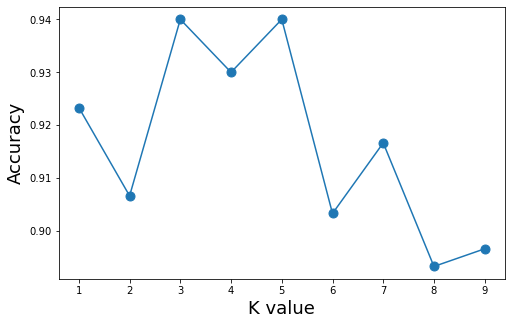

In [71]:
knn_acc = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    acc = cross_val_score(knn, sampled_X, sampled_Y, cv=5)
    knn_acc.append(acc.mean())

plt.figure(figsize=(8,5))
plt.plot(range(1,10),knn_acc, marker='o', markersize=9)
plt.xlabel("K value", fontsize=18)
plt.ylabel("Accuracy",fontsize=18)

- k=5 is optimal

#### Check the feature scaling method to KNN

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)

In [73]:
acc = cross_val_score(knn, sampled_X, sampled_Y, cv=5)
print("Accuracy KNN without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN without transformation: 0.94 (+/- 0.05)


In [74]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model',knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X, y=sampled_Y, cv=5)

print("Accuracy KNN with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Standardization: 0.94 (+/- 0.05)


In [75]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()), ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X, y=sampled_Y, cv=5)

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.94 (+/- 0.05)


- Without transformation performed well

#### Try for features with amount of; 20, 50, 100

In [76]:
acc = cross_val_score(knn, sampled_X_20, sampled_Y, cv=5)
print("Accuracy KNN using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 20 features: 0.92 (+/- 0.08)


In [77]:
acc = cross_val_score(knn, sampled_X_50, sampled_Y, cv=5)
print("Accuracy KNN using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 50 features: 0.94 (+/- 0.06)


In [78]:
acc = cross_val_score(knn, sampled_X_100, sampled_Y, cv=5)
print("Accuracy KNN using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 100 features: 0.93 (+/- 0.06)


#### Try for different number of features

In [79]:
acc = cross_val_score(knn, sampled_X_30, sampled_Y, cv=5)
print("Accuracy KNN using best 30 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 30 features: 0.94 (+/- 0.07)


In [80]:
acc = cross_val_score(knn, sampled_X_40, sampled_Y, cv=5)
print("Accuracy KNN using best 40 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 40 features: 0.94 (+/- 0.07)


In [81]:
acc = cross_val_score(knn, sampled_X_60, sampled_Y, cv=5)
print("Accuracy KNN using best 60 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 60 features: 0.94 (+/- 0.04)


In [82]:
#first 70 features with high correlation
high_cor_70=cor_target.iloc[cor_target.argsort()[-71:-1]]

# select 70 features
selected_70_x = df[high_cor_70.index]
selected_70_x.shape

# Fit the model to generate the data with 70 features dataset
oversampled_X_70, oversampled_Y = ros.fit_resample(selected_70_x, Y)
sampled_X_70, sampled_Y = rus.fit_resample(oversampled_X_70, oversampled_Y)

acc = cross_val_score(knn, sampled_X_70, sampled_Y, cv=5)
print("Accuracy KNN using best 70 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 70 features: 0.93 (+/- 0.06)


Selected Features are impoerted in a csv file

In [ ]:
import csv
with open('best_60_features.csv', 'w', encoding='UTF8',newline='') as f:
    writer = csv.writer(f)
    
    for i in range(sampled_X_60.shape[1]):
        # write the data
        writer.writerow([sampled_X_60.columns[i]])